**. Basic Image Processing Operations**
**Before diving into feature extraction and representation, it's helpful to** **understand some fundamental image processing operations:**


In [ ]:
 pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt

**1.1 Loading and Displaying an Image**

**You can use OpenCV or matplotlib for this purpose.**


In [ ]:
image= cv2.imread('rose.jfif')

In [ ]:
if image is None:
    raise ValueError("Image not loaded. Check the file path.")

In [ ]:
# Print image shape
print(f"Image shape: {image.shape}")


Image shape: (194, 259, 3)


**This line converts the image from BGR color space (default in OpenCV) to **  **RGB color space (default in Matplotlib).**

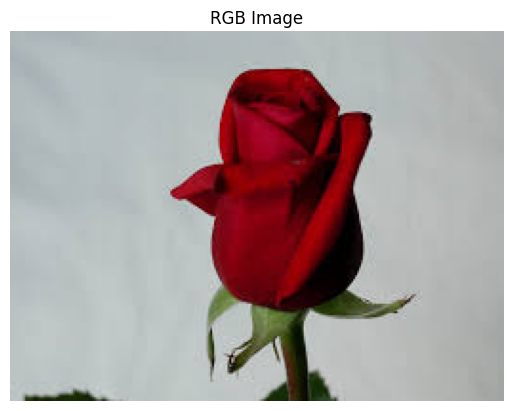

In [ ]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('RGB Image')
plt.show()

## **GRAY SCALE CONVERSIOBN(Convert he picture into the gray scale format)**

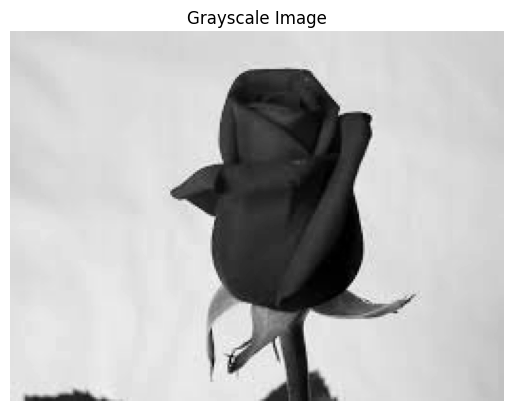

In [ ]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

In [ ]:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Print grayscale image properties
print(f"Grayscale image shape: {gray_image.shape}")
print(f"Grayscale image dtype: {gray_image.dtype}")
print(f"Grayscale image size: {gray_image.size}")

# Check if grayscale image is empty
if gray_image is None or gray_image.size == 0:
    raise ValueError("Grayscale image is empty.")


Grayscale image shape: (194, 259)
Grayscale image dtype: uint8
Grayscale image size: 50246


In [ ]:
# Check depth
if gray_image.dtype != 'uint8':
    raise ValueError("Grayscale image has incorrect depth. It should be CV_8U.")


# ** Image Resizing**
**Resize an image to a specific width and height:**


In [ ]:
width, height = 640, 480
resized_image = cv2.resize(image, (width, height))

# **Blurring (Smoothing)**
# **Apply Gaussian blur to an image:**


threshold1: This is the lower threshold for the hysteresis procedure. It is used to identify strong edges in the image.

threshold2: This is the upper threshold for the hysteresis procedure. It is used to identify weak edges that are connected to strong edges.

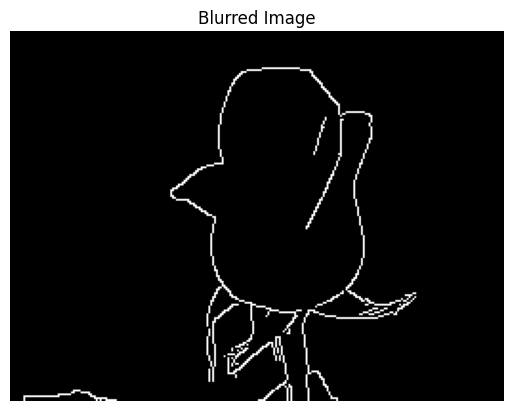

In [ ]:
blurred_image=cv2.GaussianBlur(image,(5,5),0)
edges= cv2.Canny(gray_image,threshold1=100, threshold2=200)
plt.imshow(edges,cmap ='gray')
plt.axis('off')
plt.title("Blurred Image")
plt.show()

# **Corner Detection**

# **You can use the Harris Corner Detector**:

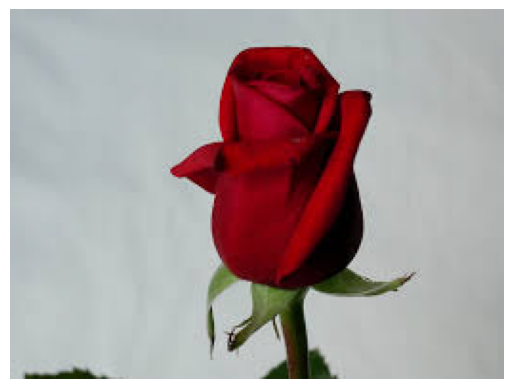

In [ ]:
import numpy as np
gray_float = np.float32(gray_image)
corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
corners_dilated = cv2.dilate(corners, None)
image[corners_dilated> 0.01 * corners_dilated.max()] = [0, 0, 255]
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



# **Feature Extraction**
# Feature extraction is the process of transforming an image into a set of features that can be used for tasks such as classification, recognition, or clustering.


# **1 Histogram of Oriented Gradients (HOG)**
# **HOG is useful for object detection**


In [ ]:
from skimage.feature import hog
from skimage import color
# Convert image to grayscale
gray_image = color.rgb2gray(image_rgb)
# Extract HOG features
features, hog_image = hog(gray_image, visualize=True, feature_vector=False)


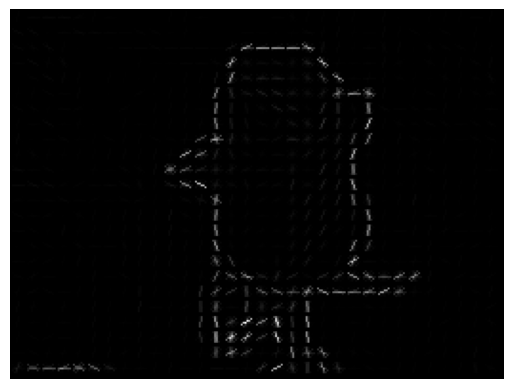

In [ ]:
# Display HOG image
plt.imshow(hog_image, cmap='gray')
plt.axis('off')
plt.show()


# **3.2 SIFT (Scale-Invariant Feature Transform)**
# **SIFT is used to find keypoints and descriptors:**


In [ ]:
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Check if keypoints are detected
if keypoints is None:
    raise ValueError("No keypoints detected. Check the input image and parameters.")


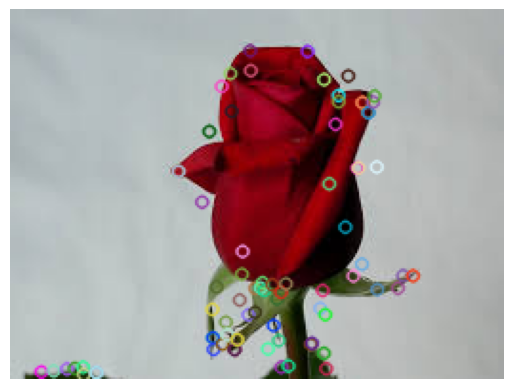

In [ ]:
image_with_keypoints = cv2.drawKeypoints(image_rgb, keypoints, None)
plt.imshow(image_with_keypoints)
plt.axis('off')
plt.show()


**ORB (Oriented FAST and Rotated BRIEF)**
**ORB is a fast alternative to SIFT:**


In [ ]:
orb = cv2.ORB_create()
# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)


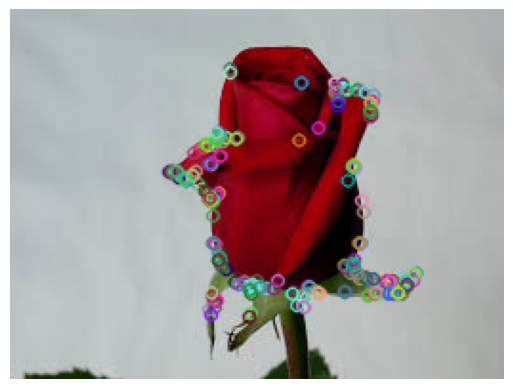

In [ ]:
# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image_rgb, keypoints, None)
plt.imshow(image_with_keypoints)
plt.axis('off')
plt.show()
